In [33]:
# Importing Important Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [34]:
# Generating data
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=20)

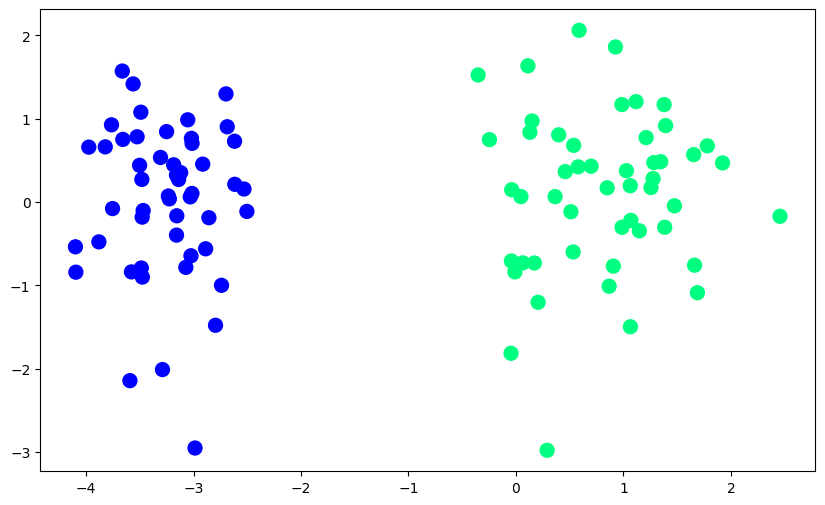

In [35]:
# Data Preview
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

# Applying Sklearn Logistics Class

In [104]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression(penalty=None,solver='sag')
lor.fit(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [105]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [106]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

# Creating Logistics Regression using Gradient Descent

In [107]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

In [120]:
def gd(X,y):

  X = np.insert(X,0,1,axis=1)
  weights = np.ones(X.shape[1])
  lr = 0.5

  for i in range(3000):
    y_hat = sigmoid(np.dot(X,weights))
    weights = weights + lr * (np.dot((y - y_hat),X)/X.shape[0])

  return weights[0], weights[1:]

In [121]:
intercept_,coef_ = gd(X,y)

In [122]:
print(intercept_)
print(coef_)

5.326795923389575
[4.48732321 0.18187793]


In [123]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [124]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

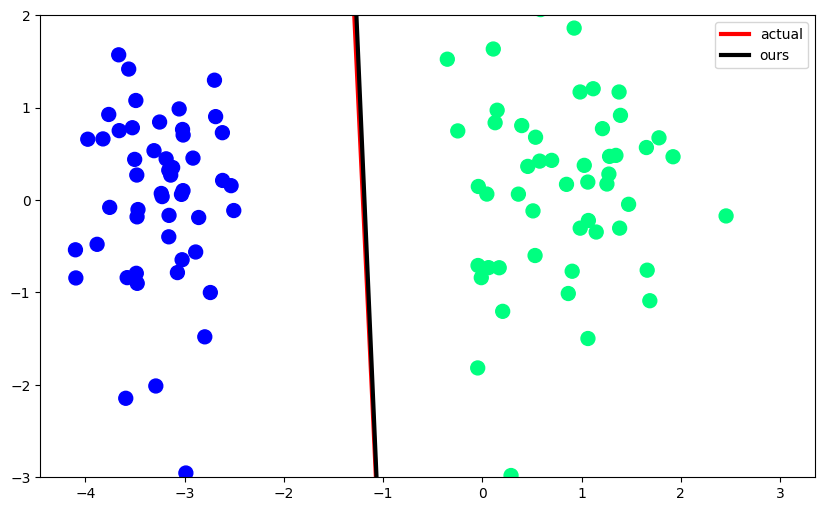

In [125]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3,label='actual')
plt.plot(x_input1,y_input1,color='black',linewidth=3,label='ours')
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

plt.legend()
plt.show()